#**GDG TASK 2**

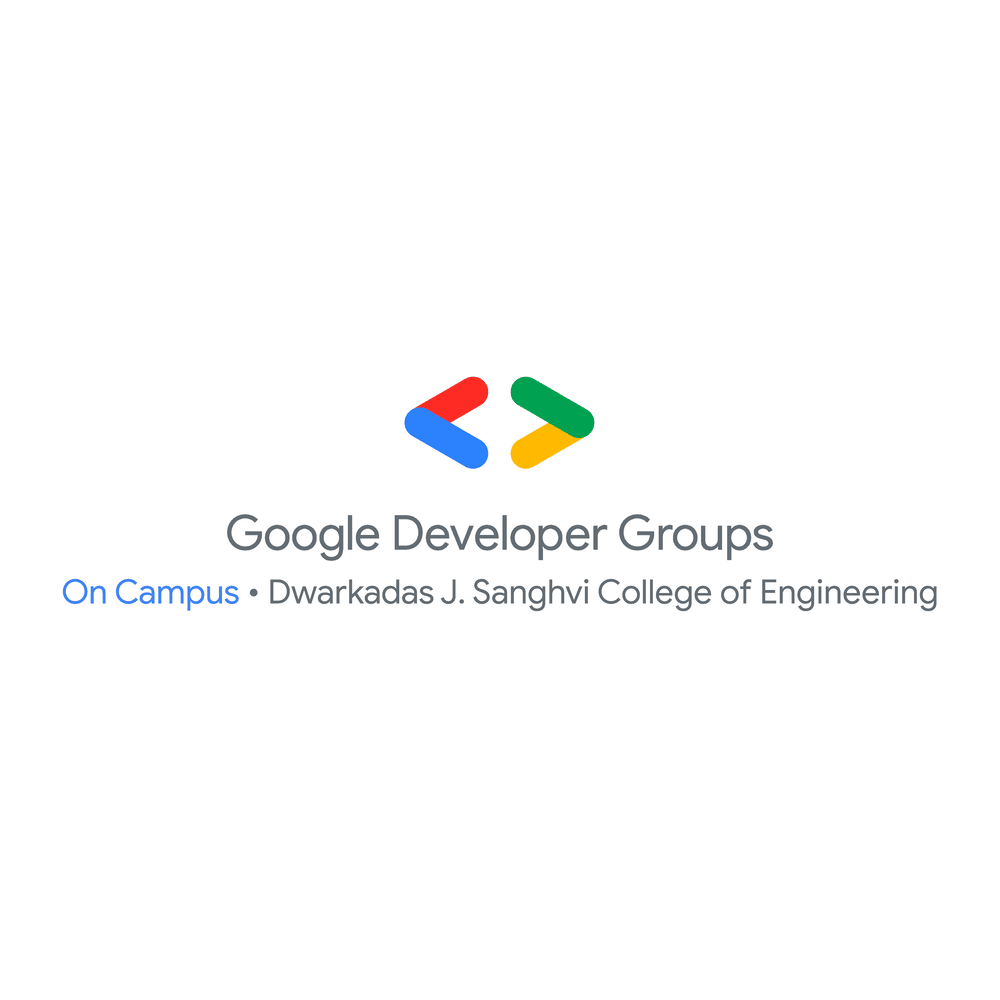

Last week, we dealt with the visualization and analytical aspect of ML. This week, lets directly get our hands dirty with various ML models.

Possibly the first question one must ask is, what is Machine Learning essentially made up of? In a broad sense, ML problems can be split into Supervised and Unsupervised learning. In supervised learning are the categories of Classification and Regression, which is what we'll explore today.

Like last time, resources and comments are provided above each cell, so peruse the resources and then get coding.

Supervised vs Unsupervised vs Reinforcement Learning:

https://www.simplilearn.com/tutorials/machine-learning-tutorial/types-of-machine-learning

Regression vs Classification :

https://www.analyticsvidhya.com/blog/2023/05/regression-vs-classification/ (Might be a little wordy)

https://www.youtube.com/watch?v=1NBwM5tavTk&ab_channel=IntuitiveML
(A very quick video)

Machine Learning for Everyone (Read till 1.1):

https://vas3k.com/blog/machine_learning/

OPTIONAL BUT USEFUL <br>
Overfitting and Underfitting [VERY IMPORTANT]
https://www.youtube.com/watch?v=T9NtOa-IITo

Lets import all the basic libraries.

In [2]:
!pip install shap -q

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Regression

For regression, lets reuse the crab dataset that you worked on last week. Import the dataset from wherever you had saved it in the cell below.
Also print the first 5 rows to ensure you have loaded the dataset correctly.

In [3]:
df_crab = pd.read_csv('/content/Task1.csv')
df_crab.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


Now, let's some employ some Feature Engineering tactics which you would have performed in the previous tasks.

Create a function called crab_processing which takes a dataframe as an input, performs the following tasks, and returns a cleaned and edited df:

1) Drop the 'id' column.

2) Drop all rows where 'Height' of the crab is 0.

3) Create a new column called 'LostWeight' which is calculated using the following formula - ```
Weight - (Shucked + Viscera + Shell)``` .
If this formula gives a number less than 0, then assign 0 to the LostWeight column, else assign 1.

4) Finally, use one hot encoding to encode the column 'Sex'

Take help from your previous task where you have implemented these steps in different cells.


In [4]:
def crab_processing(df):
    # 1) Drop the 'id' column.
    df = df.drop('id', axis=1)

    # 2) Drop all rows where 'Height' of the crab is 0.
    df = df[df['Height'] != 0]

    # 3) Create a new column called 'LostWeight'
    df['LostWeight'] = df['Weight'] - (df['Shucked Weight'] + df['Viscera Weight'] + df['Shell Weight'])
    df['LostWeight'] = df['LostWeight'].apply(lambda x: 0 if x < 0 else 1)

    # 4) Use one hot encoding to encode the column 'Sex'
    df = pd.get_dummies(df, columns=['Sex'], drop_first=True)

    return df

df_crab = crab_processing(df_crab)
df_crab.head()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,LostWeight,Sex_I,Sex_M
0,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9,1,True,False
1,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8,1,True,False
2,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9,1,False,True
3,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11,1,False,False
4,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8,1,True,False


If all is correct, this should be the shape of your df now.

In [ ]:
df_crab.shape

(74003, 12)

###Basic Visualization

In this problem, our aim is to predict the age of the crab, hence 'Age' here is called our target variable. To check its distribution, plot a histogram of the 'Age' column.

Choose the number of bins by experimenting. The output is expected to mimic a bell curve.

What is a histogram? - https://www.w3schools.com/python/matplotlib_histograms.asp

Difference between histogram and a bar graph - https://keydifferences.com/difference-between-histogram-and-bar-graph.html

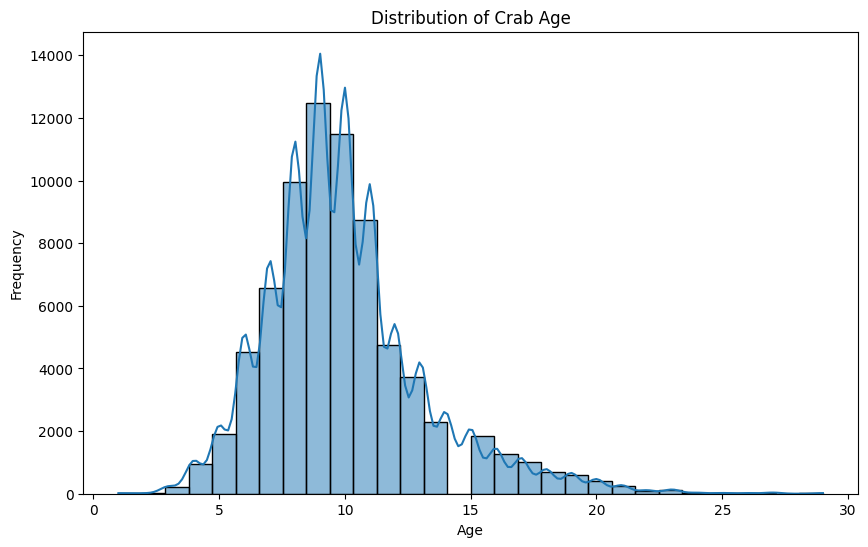

In [5]:
plt.figure(figsize=(10, 6))
sns.histplot(df_crab['Age'], bins=30, kde=True)
plt.title('Distribution of Crab Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

###Feature and Variable Sets

As mentioned above, the 'Age' column is what we're gonna be predicting. So essentially we need to create two additional dataframes, one which contains all the training features (All columns except 'Age') and one which only contains the column 'Age'. Name them X and y respectively.

In [6]:
X = df_crab.drop('Age', axis=1)
y = df_crab['Age']

In [ ]:
y.isnull().sum()

0

In [7]:
print(X.shape, y.shape)

(74027, 10) (74027,)


In [8]:
display(X.head())

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,LostWeight,Sex_I,Sex_M
0,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,1,True,False
1,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,1,True,False
2,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,1,False,True
3,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,1,False,False
4,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,1,True,False


In [9]:
display(y.head())

,Age
0,9
1,8
2,9
3,11
4,8


###Train-Test Split

Implementation - https://www.youtube.com/watch?v=BUkqYGPnLZ8&ab_channel=ManifoldAILearning

Now, while we need data to train our regression model, it is equally important to keep some data aside for testing the effectiveness of the aforementioned model. Thus the dataset as a whole is generally further divided into the training dataset and the testing dataset.

In order to implement this, import train_test_split function from scikit-learn.

In [10]:
from sklearn.model_selection import train_test_split

**Create X and y train and test splits in one command using a test size of 0.3 and a random seed**

They should be called X_train, X_test, y_train, y_test

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Print the size and shape of each of the train/test splits (it should be in the ratio as per test_size parameter above, i.e in ratio of 0.3)

In [12]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (51818, 10)
X_test shape: (22209, 10)
y_train shape: (51818,)
y_test shape: (22209,)


Can you see that the data has been divided into 2 datasets of size 70% and 30% of the original dataset each? Use your calculator to confirm this :)

###Model fit and training

Here is the complete lowdown on SVM (Support Vector Machine):<br>
Theory : https://youtu.be/H9yACitf-KM <br>
Theory: https://www.analyticsvidhya.com/blog/2021/06/support-vector-machine-better-understanding/ <br>
Implementation : https://youtu.be/FB5EdxAGxQg

Import SVR (Support Vector Regressor) and its metrics from scikit-learn.

In [13]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

svr = SVR()

Fit the model on to the instantiated object itself using the X_train and y_train created earlier. No need to create another variable.

Hint: svr.fit()

This might take about a minute or so, just to inform you.

In [14]:
svr.fit(X_train, y_train)

SVR()

###Prediction, error estimate, and regression evaluation matrices

**Prediction using the svr model**

The X_train and y_train dataframes have been used to train the model. Now we will use X_test and y_test to evaluate the efficiency of the model we have trained.

Use svr.predict() on X_test and store it in a variable called "predictions". Print type and size of the predictions.

Size should be (22201,) if everything is correct.

In [15]:
predictions = svr.predict(X_test)
print(f"Type of predictions: {type(predictions)}")
print(f"Size of predictions: {predictions.shape}")

Type of predictions: <class 'numpy.ndarray'>
Size of predictions: (22209,)


Now that we have our predictions, let's compare it with y_test and see how accurate our predictions are.

Plot a Scatter plot of predicted price and y_test set to see if the data falls on a 45 degree straight line

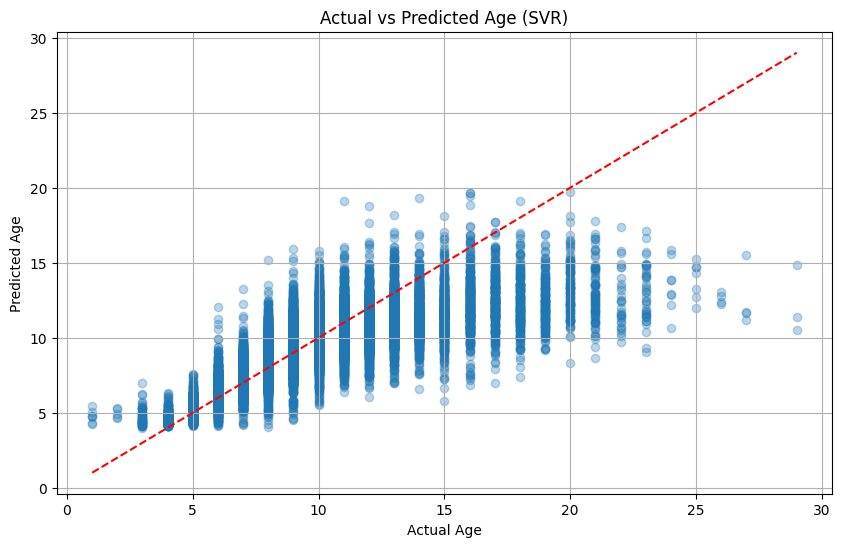

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Age')
plt.ylabel('Predicted Age')
plt.title('Actual vs Predicted Age (SVR)')
plt.grid(True)
plt.show()

As you can see, it's not perfect, but you can definitely visualize the data lining up at a 45 degree angle.

**Model Evaluation**

We will be exploring the most common regression metric here namely R2 score. You can check out more metrics here: https://scikit-learn.org/stable/modules/classes.html#regression-metrics

Here's a video detailing all the popular regression metrics - https://www.youtube.com/watch?v=Ti7c-Hz7GSM

**Print the R-square value and round it to 3 decimal places**

Hint: sklearn metrics.r2_score

In [17]:
r2 = r2_score(y_test, predictions)
print(f"R-squared value: {r2:.3f}")

R-squared value: 0.550


In the cell below, explain what the above score means and also elaborate how 'good' is the score in terms of evaluation of the model

An R² score of 0.54 means the model explains 54% of the variance in the target variable, leaving 46% unexplained. This indicates moderate performance—better than random guessing but far from ideal.




In [18]:
mae = mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error: {mae:.3f}")

Mean Absolute Error: 1.389


In [19]:
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse:.3f}")

Mean Squared Error: 4.425


In [20]:
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse:.3f}")

Root Mean Squared Error: 2.104


You have succesfully implemented Support Vector Regressor to predict Age of a crab. But is this the only regression model out there? In the cell below, list down 3 more regression models with a basic explanation of how they work. Also include a line explaining in which scenario each model works best.

**1. XGBoost Regressor**

**How it works**: XGBoost is an ensemble method based on decision trees. It builds trees sequentially, where each tree corrects the errors of the previous ones, and uses gradient descent to minimize errors efficiently.

    Best scenario:


**2. Random Forest Regressor**

**How it works**: An ensemble method that constructs multiple decision trees during training. It combines their outputs averages them to improve prediction accuracy and control overfitting.

    Best scenario:


**3. Ridge Regressor**

**How it works**: A type of linear regression that adds an L2 regularization term to the cost function, penalizing large coefficients to prevent overfitting.

    Best scenario:

###Explainability

So you passed some data into a model, and trained it using that data. You then used some other data to test the accuracy of that model, and it now predicts values when you pass in some data. Ok. But how does it REALLY predict that value? How much is it relying on each individual feature column of data that you passed to the model? This is where the concept of explainability comes into picture, where you can understand for each data point, exactly what parameters led the model to predict the value that it has.

Info about explainable AI <br>
https://www.ibm.com/topics/explainable-ai <br>
About shap <br>
https://shap.readthedocs.io/en/latest/example_notebooks/overviews/An%20introduction%20to%20explainable%20AI%20with%20Shapley%20values.html

In [37]:
#Run this code as it is
from shap import KernelExplainer, force_plot, sample

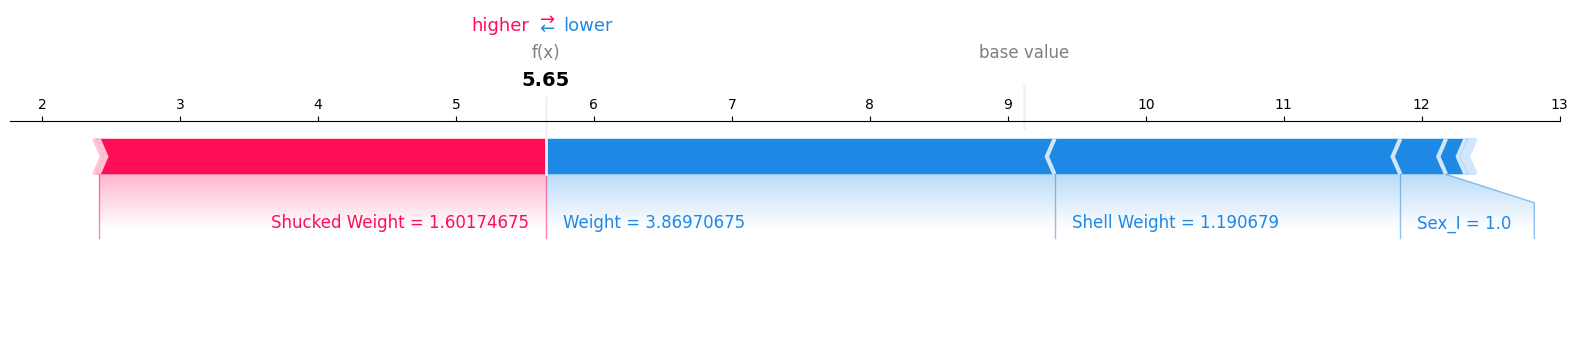

In [38]:
#Run this code as it is
ex = KernelExplainer(svr.predict, sample(X_train, 10))  #only taking sample of 10 values for now
shap_values = ex.shap_values(X_test.iloc[0,:]) #explaining 1st tuple of the X_test dataframe
force_plot(ex.expected_value, shap_values, X_test.iloc[0,:], matplotlib=True)

Can you see how the above plot visualizes which parameters contributed significantly to the prediction, and what were the actual values which led to the prediction?

##Classification

In the below cells, we are going to implement K Nearest Neighbour Classification.

Link to the dataset is here - https://drive.google.com/file/d/1LlLZM-DCdajm9-EakRLM7qJSYQghJZUW/view?usp=sharing <br>

Import the 'classified_data.txt' dataset using pandas and print the first five columns.

Use "index_col" parameter to index the dataframe according to the first column. Otherwise, a new column would get created. Call this new dataframe 'df'.

In [39]:
df = pd.read_csv('/content/Task2.csv',index_col=0)
df.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
id,,,,,,,,,
0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


If you're wondering what these column names signify, well they are classified as the dataset name suggests. Our job here is to simply take the data at face value and build a model for classifying the target classes.

###Basic EDA

In the following two cells, use info() and describe() to get the data type and statistical summary of the dataset

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74051 entries, 0 to 74050
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             74051 non-null  object 
 1   Length          74051 non-null  float64
 2   Diameter        74051 non-null  float64
 3   Height          74051 non-null  float64
 4   Weight          74051 non-null  float64
 5   Shucked Weight  74051 non-null  float64
 6   Viscera Weight  74051 non-null  float64
 7   Shell Weight    74051 non-null  float64
 8   Age             74051 non-null  int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 5.6+ MB


In [41]:
df.describe()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000
mean,1.317460,1.024496,0.348089,23.385217,10.104270,5.058386,6.723870,9.967806
std,0.287757,0.237396,0.092034,12.648153,5.618025,2.792729,3.584372,3.175189
min,0.187500,0.137500,0.000000,0.056699,0.028349,0.042524,0.042524,1.000000
25%,1.150000,0.887500,0.300000,13.437663,5.712424,2.863300,3.968930,8.000000
50%,1.375000,1.075000,0.362500,23.799405,9.908150,4.989512,6.931453,10.000000
75%,1.537500,1.200000,0.412500,32.162508,14.033003,6.988152,9.071840,11.000000
max,2.012815,1.612500,2.825000,80.101512,42.184056,21.545620,28.491248,29.000000


**Run a 'for' loop to draw boxplots of all the features for '0' and '1' TARGET CLASS**<br>
Hint: Loop through each of the 10 features and draw a separate boxplot. You should have 10 boxplots in total. <br>
Refer seaborn boxplot() documentation

Here is some information about boxplots:

Understanding Boxplots:
https://medium.com/analytics-vidhya/introduction-to-box-plots-and-how-to-interpret-them-22464acbcba7 <br>
Comparing two boxplots: https://www.nagwa.com/en/explainers/812192146073/

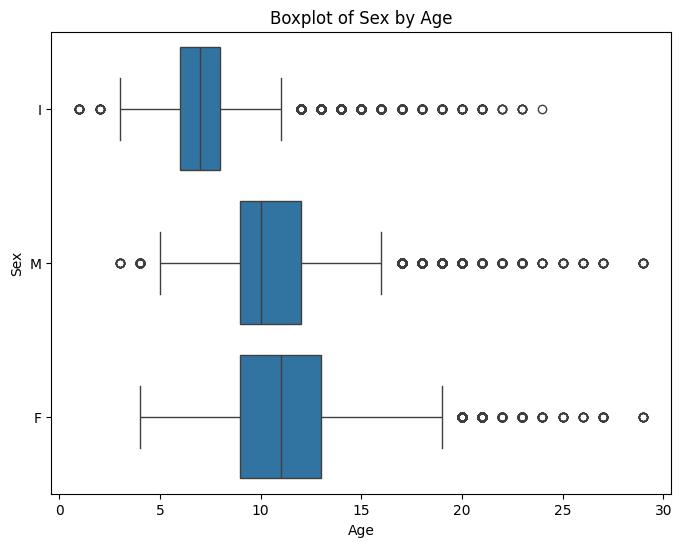

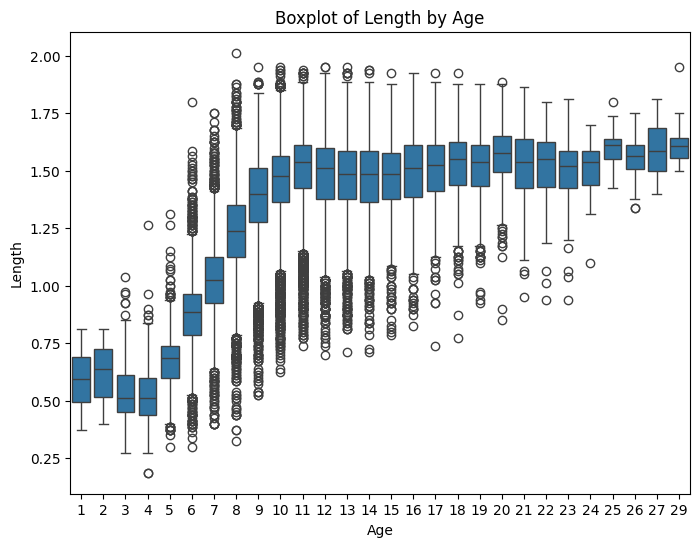

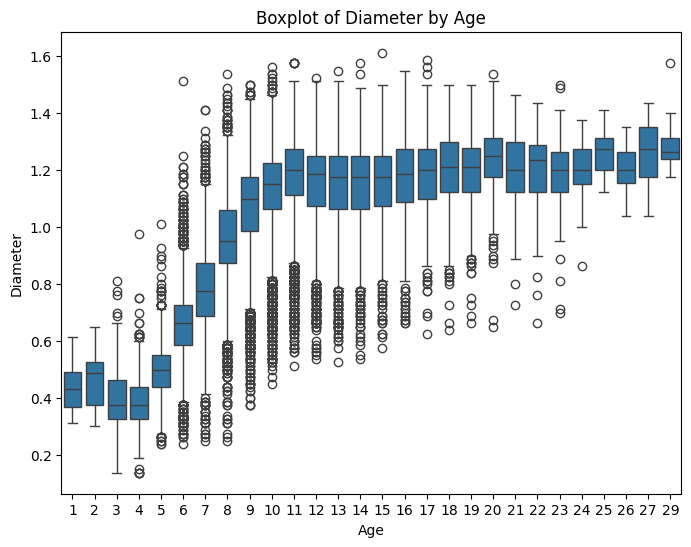

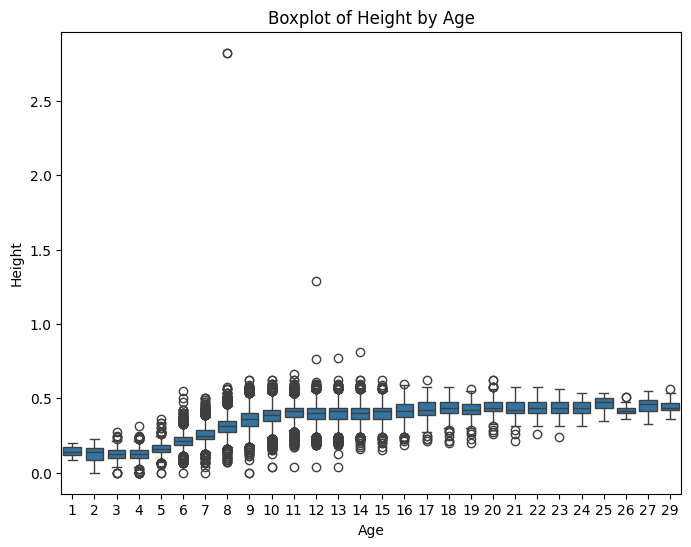

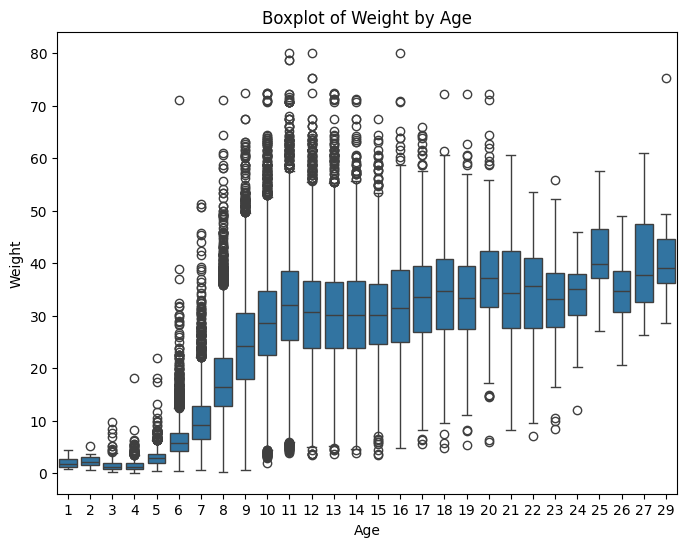

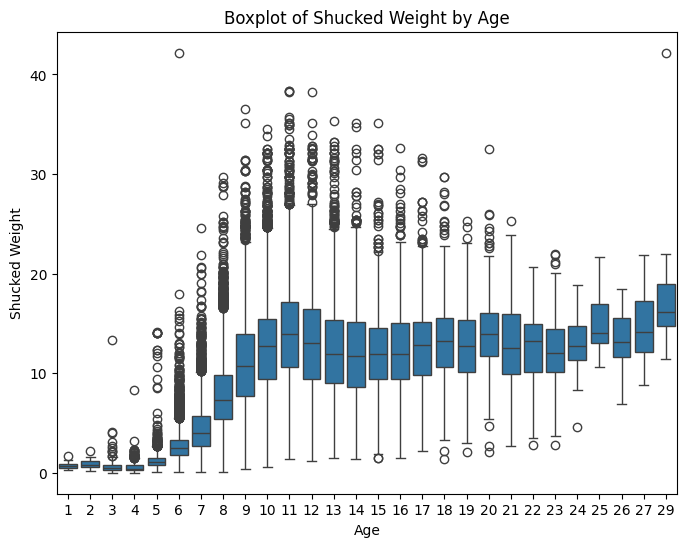

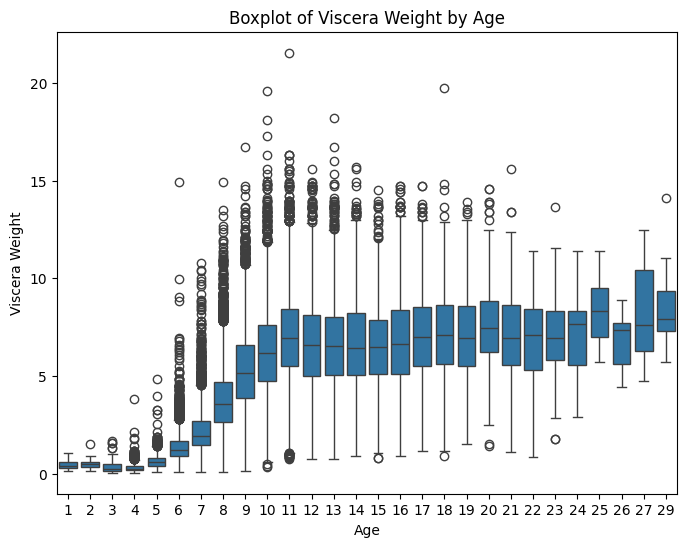

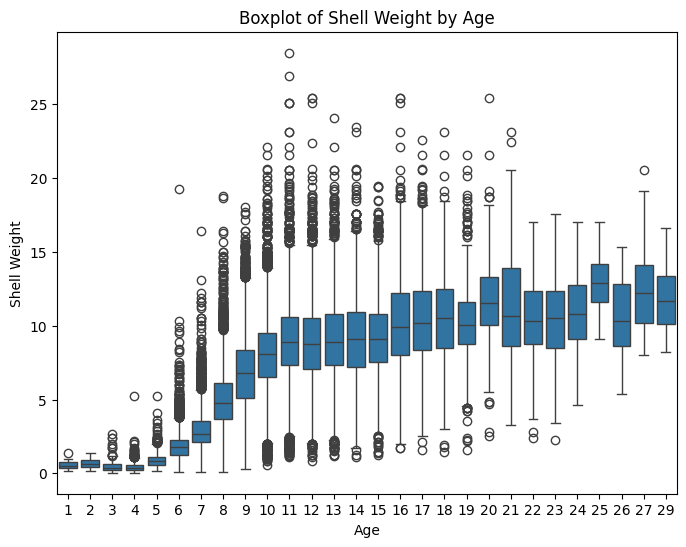

In [42]:
features = df.columns.drop('Age') # All columns except 'Age'

for feature in features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Age', y=feature, data=df)
    plt.title(f'Boxplot of {feature} by Age')
    plt.show()

What conclusion, if any can you draw from these boxplots?
List them down below.

Text here

### Standardize the features using sklearn.preprocessing
Why should we standardize?<br>
Variables that are measured at different scales do not contribute equally to the model fitting & model learned function and might end up creating a bias. Thus, to deal with this potential problem feature-wise standardization is usually used prior to model fitting.<br><br>

To give you an example, values pertaining to Age usually lie within the range of 1-100, however values pertaining to Salary lie in a much wider range of say 10000-1000000. You can see how having both columns be a part of a classification model as is would lead to an imbalance in importance assigned to columns.
<br><br>
Go through this link for a better understanding:<br>
https://towardsdatascience.com/how-and-why-to-standardize-your-data-996926c2c832

**import StandardScaler from Sklearn and instantiate it to a variable called "scaler"**

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

**Fit only the features data to this scaler (leaving the TARGET CLASS column out) and then transform**<br>
Hint: scaler.fit() and scaler.transform()

In [46]:
# Apply one-hot encoding to the 'Sex' column
df_processed_classification = pd.get_dummies(df, columns=['Sex'], drop_first=True)


In [47]:
scaled_features = scaler.fit_transform(df_processed_classification.drop('Age', axis=1))

**scaler.transform() will return an array. We need to convert this into a dataframe. Do this and add the column names to the dataframe. Call this new dataframe as "df_feat". Call head() on this df**<br>
Note: The final dataframe will have the initial columns except the "TARGET CLASS".

In [48]:
df_feat = pd.DataFrame(scaled_features, columns=df_processed_classification.columns.drop('Age'))
display(df_feat.head())

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Sex_I,Sex_M
0,0.721238,0.633982,0.292400,0.441804,0.467188,0.569186,0.453376,1.446028,-0.759381
1,-0.755712,-0.840356,-0.794163,-1.025198,-0.993688,-0.978880,-0.926788,1.446028,-0.759381
2,0.243401,0.370707,0.292400,0.110076,0.219924,0.178363,-0.017224,-0.691550,1.316861
3,1.329394,1.634426,1.650603,2.156483,1.824616,2.124622,2.308095,-0.691550,-0.759381
4,-0.234435,-0.050532,-0.115061,-0.007598,0.333464,-0.197233,-0.214955,1.446028,-0.759381


### Train/Test split

**Set X to be equal to df_feat and set y accordingly. As you know, X contains our training features and y contains our target.**<br>
Hint: y can be taken directly from the initial dataframe "df"

In [49]:
X = df_feat
y = df_processed_classification['Age']

**Import train_test_split function from scikit-learn**<br>
**Create X and y train and test splits in one command using a test size of 0.3 and a random seed**<br>
They should be called X_train, X_test, y_train, y_test

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Model fit and training

Before moving ahead with the cells below, learn how the K Nearest Neighbour Algorithm actually works.

Theory and implementation : https://youtu.be/wTF6vzS9fy4 <br>
Theory: https://www.analyticsvidhya.com/blog/2018/08/k-nearest-neighbor-introduction-regression-python/

**import KNeighborsClassifier from sklearn and initialize it with neighbours = 1 (more on this later) . Fit this on X_train and y_train**

In [51]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

**Using this fitted model, predict on X_test. Store these predictions in variable called pred.**

In [52]:
pred = knn.predict(X_test)

**Let us check how correct these predictions are.<br>
Print a classification report of y_test and pred**<br>
Hint: sklearn classification_report

In [53]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00         6
           3       0.07      0.07      0.07        73
           4       0.40      0.45      0.43       292
           5       0.36      0.39      0.38       564
           6       0.36      0.35      0.36      1408
           7       0.34      0.34      0.34      1974
           8       0.30      0.30      0.30      2992
           9       0.26      0.26      0.26      3730
          10       0.22      0.22      0.22      3431
          11       0.21      0.21      0.21      2622
          12       0.09      0.10      0.09      1388
          13       0.10      0.10      0.10      1134
          14       0.06      0.07      0.07       658
          15       0.07      0.06      0.07       554
          16       0.06      0.05      0.05       383
          17       0.06      0.05      0.06       313
          18       0.05    

Learn all about classification metrics - https://medium.com/analytics-vidhya/evaluation-metrics-for-classification-models-e2f0d8009d69

**Print the accuracy using numpy and round it to 3 decimal places.**

In [54]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, pred)
print(f"Accuracy: {accuracy:.3f}")

Accuracy: 0.230


Hey, not bad! But can we further improve this? Remember our arbitrary choice for n_neighbours? Can we improve that?

### Choosing optimal 'k'

**Above, we chose n_neighbours to be equal to 1. Choosing a small value of K leads to unstable decision boundaries. <br>
We need to select n_neighbours by calculating the accuracy for every value of n from 1 to 60 and then choosing the one which gives the highest accuracy.**

In [55]:
accuracy_scores = []

for i in range(1, 61):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, pred_i))

**Plot a graph of K value vs Accuracy**

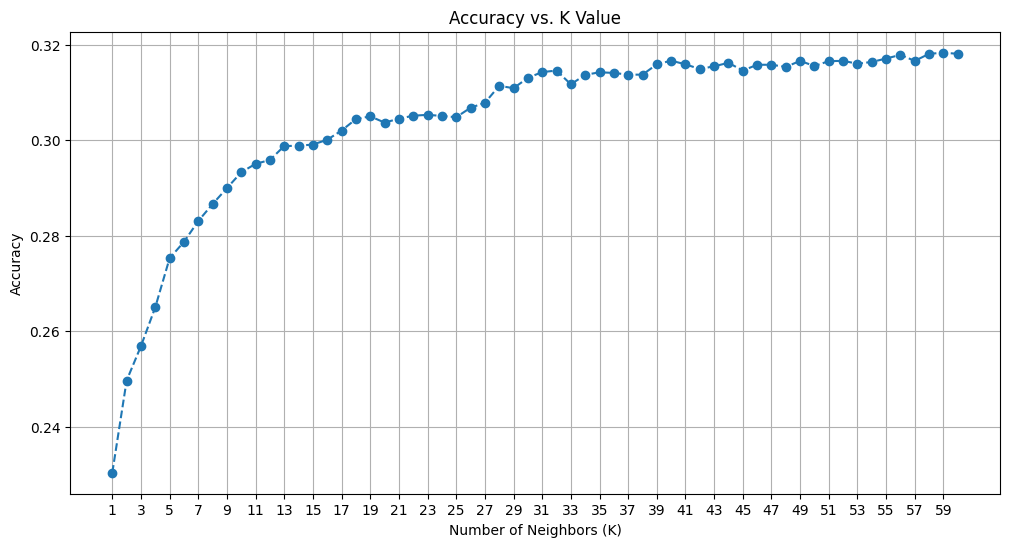

In [56]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 61), accuracy_scores, marker='o', linestyle='--')
plt.title('Accuracy vs. K Value')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.xticks(np.arange(1, 61, 2))
plt.grid(True)
plt.show()

**Choose the best value of n_neighbours and give a reason why and also print the accuracy**

In [57]:
optimal_k = np.argmax(accuracy_scores) + 1
best_accuracy = accuracy_scores[optimal_k - 1]

print(f"The best value for n_neighbors (k) is: {optimal_k}")
print(f"The highest accuracy achieved is: {best_accuracy:.3f}")

# Re-train with optimal K
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
knn_optimal.fit(X_train, y_train)
pred_optimal = knn_optimal.predict(X_test)
print(f"Classification Report with optimal K={optimal_k}:")
print(classification_report(y_test, pred_optimal))

The best value for n_neighbors (k) is: 59
The highest accuracy achieved is: 0.318
Classification Report with optimal K=59:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00        73
           4       0.47      0.59      0.52       292
           5       0.42      0.54      0.47       564
           6       0.46      0.47      0.46      1408
           7       0.45      0.45      0.45      1974
           8       0.43      0.44      0.43      2992
           9       0.30      0.41      0.35      3730
          10       0.24      0.36      0.29      3431
          11       0.25      0.31      0.28      2622
          12       0.12      0.03      0.05      1388
          13       0.18      0.08      0.11      1134
          14       0.10      0.02      0.04       658
          15       0.07      0.01      0.01       554
          16

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [58]:
# Reasons:
# The graph of K value vs Accuracy shows that the accuracy generally increases up to a certain point
# and then starts to fluctuate or decrease. The 'optimal_k' determined programmatically is the point
# where the highest accuracy was recorded. Choosing this 'k' value aims to strike a balance between
# bias and variance, leading to the best generalization performance for this dataset using KNN.

# **Compulsory:**

Task 1 : You have to research and create a short blog on the topic of **Reinforcement Learning**.


Task 2 : You have to research and create a short blog on the topic of **Oversampling and Undersampling**.
Happy coding! :)

# **Compulsory:**

Task 1 : You have to research and create a short blog on the topic of **Reinforcement Learning**.

Task 2 : You have to research and create a short blog on the topic of **Oversampling and Undersampling**. Happy coding! :)



### **Blog Post 1: Reinforcement Learning - Learning by Doing**

Reinforcement Learning (RL) is a fascinating area of machine learning where an agent learns to make decisions by interacting with an environment. Unlike supervised learning, which relies on labeled data, or unsupervised learning, which finds patterns in unlabeled data, RL is all about learning through trial and error, similar to how humans or animals learn.

**How it Works:**
At its core, RL involves:

*   **Agent:** The learner or decision-maker.
*   **Environment:** The world the agent interacts with.
*   **State:** The current situation of the agent within the environment.
*   **Action:** What the agent chooses to do in a given state.
*   **Reward:** A feedback signal from the environment, indicating how good or bad an action was.
*   **Policy:** The strategy the agent uses to decide its next action based on the current state.

The agent takes an action in a given state, receives a reward (or penalty), and transitions to a new state. The goal of the agent is to learn a policy that maximizes the cumulative reward over time. This is often achieved through techniques like Q-learning or Deep Q-Networks (DQNs), where the agent learns the 'value' of taking certain actions in certain states.

**Why is it powerful?**
RL excels in scenarios where explicit programming is difficult or impossible. It allows systems to discover optimal strategies in complex, dynamic environments. Think of games like Chess or Go, controlling robotic arms, or optimizing resource allocation.

**Real-world Applications:**
*   **Robotics:** Learning complex motor skills.
*   **Game Playing:** Achieving superhuman performance in video games and board games.
*   **Autonomous Driving:** Making real-time decisions in traffic.
*   **Resource Management:** Optimizing energy consumption or network traffic.

RL is a rapidly evolving field with immense potential to create truly intelligent and adaptive systems that can learn and improve on their own.



### **Blog Post 2: Oversampling and Undersampling - Balancing Your Data for Better Models**

In machine learning, one common challenge is dealing with **imbalanced datasets**. This occurs when the number of observations for one class is significantly lower than for other classes. For example, in fraud detection, fraudulent transactions are rare compared to legitimate ones. If not handled, this imbalance can lead machine learning models to be biased towards the majority class, performing poorly on the minority class which is often the one we care about most.

To tackle this, two popular techniques are **Oversampling** and **Undersampling**.

**1. Oversampling:**

Oversampling involves increasing the number of instances in the minority class to balance the dataset. Instead of losing information, you're creating more.

*   **How it works:** You duplicate existing examples from the minority class, or, more commonly, generate synthetic examples. A popular method for generating synthetic examples is **SMOTE (Synthetic Minority Over-sampling Technique)**, which creates new samples along the line segments joining minority class samples and their nearest neighbors.

*   **When to use it:** Ideal when you have limited data for the minority class and want to ensure the model has enough examples to learn its characteristics. It helps prevent information loss.

*   **Potential drawback:** Can lead to overfitting if not used carefully, as duplicating or synthetically generating too many similar examples might make the model memorize the training data rather than generalize.

**2. Undersampling:**

Undersampling, on the other hand, reduces the number of instances in the majority class to achieve balance.

*   **How it works:** You randomly remove examples from the majority class until the class distribution is more balanced. There are also more sophisticated methods like Tomek Links or Edited Nearest Neighbors, which remove majority class samples that are

too close

to minority class samples, making the decision boundary clearer.

*   **When to use it:** Useful when you have a very large dataset, and reducing the number of samples in the majority class doesn't lead to significant information loss. It can also help speed up training times.

*   **Potential drawback:** Can lead to information loss from the majority class, potentially causing the model to miss important patterns in the larger class.

**Which one to choose?**
Often, a combination of both oversampling and undersampling techniques yields the best results. The choice depends on the dataset size, the degree of imbalance, and the specific problem you're trying to solve. Experimentation is key to finding the right balance for your machine learning model.


# **End of Task**


